# Erro estacionário

Em sistemas de controle, temos dois momentos importantes de operação do nosso sistema: Regime estacionário e Regime transitório. Acontece que, ao se colocar uma entrada qualquer em um sistema, o mesmo apresentará inicialmente uma variação considerável na saída. Porém, com o tempo, essa saída se estabiliza em um valor x. Dessa maneria, há um momento específico no tempo que a saída deixa de assumir valores transitórios e passa a assumir valores estacionários. Assim, faremos inicialmente a análise desses sistemas em regime estacionário, quando a saída já se estabilizou. Neste momento, passa a existir uma variável que chamamos de erro transitório, ou erro em regime. Este erro indica o quanto a saída real está "distante" da saída desejada.

IMPORTANTE: Só podemos aplicar toda a teoria apresentada abaixo se o sistema for estável.

## Considere o seguinte sistema de controle:
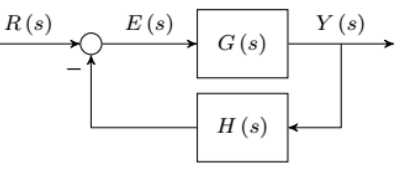

A expressão do erro pode ser deduzida por (ver o slide Cap_02_02 no site do prof Pimentel): $E(S) = R(S) - Y(S) H(S)$

Assim podemos concluir que o valor do erro depende do tipo de entrada $R(S)$ que colocamos nos sistema. Vamos agora definir as funções de transferência de um sistema que tem os seguintes blocos:

$$G(S) =  \frac{10(S+20)(S+30)}{S(S+25)(S+35)} = \frac{10S^2 + 500S + 6000}{S^3 + 60S^2 + 875S}$$

$$H(S) = 1$$

Primeiramente, o sistema é estável? Sim! (Fica como exercício provar)

In [ ]:
!pip install control matplotlib pandas numpy

In [4]:
import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definindo os blocos do sistema

In [9]:
G = ctrl.tf([10,500,6000], [1,60,875,0])
print(G)

H = ctrl.tf([1], [1])
print(H)

<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


10 s^2 + 500 s + 6000
---------------------
s^3 + 60 s^2 + 875 s

<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1
-
1



# Erro estacionário para uma entrada degrau

Considere a entrada $r(t) = 15u(t)$, vamos calcular o erro para esse valor de entrada. Primeiro, encontraremos a FTMF para definir todo o sistema matematicamente.

In [21]:
FTMF = ctrl.feedback(G, H, -1)
print(FTMF)

<TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   10 s^2 + 500 s + 6000
----------------------------
s^3 + 70 s^2 + 1375 s + 6000



Agora, vamos criar a entrada. Uma entrada degrau é zero para $t < 0$ e um (ou o valor de amplitude) para $t \geq 0$. Usando a biblioteca numpy, conseguimos criar um array com a resposta ao degrau, utilizando a função ones_like().

In [58]:
t = np.linspace(0, 3, 5000) # Criamos primeiro o eixo do tempo de 0s até 3s com 1000 divisões nesse intervalo

print(t)

[0.00000000e+00 6.00120024e-04 1.20024005e-03 ... 2.99879976e+00
 2.99939988e+00 3.00000000e+00]


In [59]:
u = np.ones_like(t) * 15 # Criamos um array somente com valores de 1 para cada valor de tempo e depois multiplicamos cada um pela amplitude do degrau

print(u)

[15. 15. 15. ... 15. 15. 15.]


# Gráfico da entrada

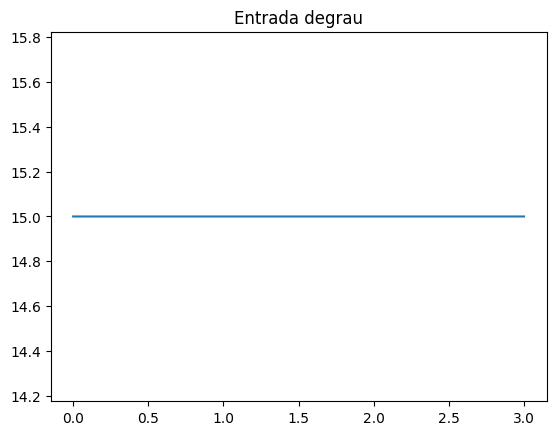

In [66]:
plt.plot(t, u)
plt.title("Entrada degrau")
plt.show()

Assim, temos cada momento que vamos medir a saída na variável t e cada valor de entrada que vamos colocar no sistema na variável u. Usando a função forced_response da control, podemos colocar qualquer tipo de entrada em nosso sistema. Passamos nossa FTMF, nossos pontos no tempo, e nossos valores de entrada nesses pontos no tempo e a função nos retorna o valor de saída para cada um daqueles pontos no tempo.

In [60]:
t_out, y_out = ctrl.forced_response(FTMF, T=t, U=u)

print(y_out)

[ 0.          0.08948115  0.17790187 ... 14.99999985 14.99999985
 14.99999985]


Agora podemos plotar essa curva em um gráfico e ver o comportamento:

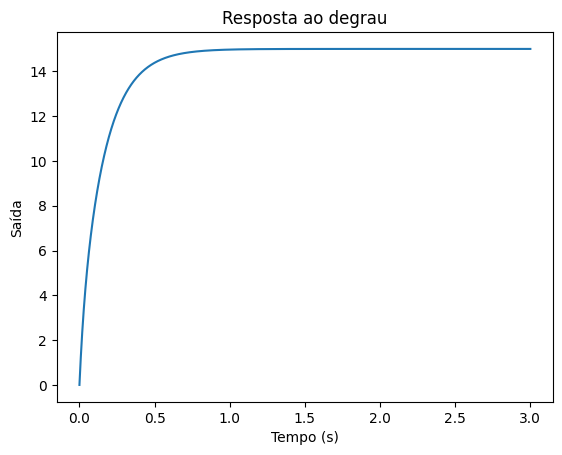

In [61]:
plt.plot(t_out, y_out)
plt.title("Resposta ao degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída")
plt.show()

Vamos agora calcular o erro. Para cada saída do sistema, existe um valor de erro associado a mesma. Como queremos o erro estacionário, vamos considerar os últimos 50 pontos e calcular a média desses erros:

In [63]:
erro = np.abs(y_out - u)
erro_estacionario = np.mean(erro[-50:])

print("\nErro estacionário: " + str(erro_estacionario))


Erro estacionário: 1.6740915469881657e-07


Vemos que o erro calculado é tão pequeno que podemos considerá-lo como sendo zero. Isso é evidente, visto que nosso sistema é do tipo 1 e inserimos uma entrada degrau.

Vamos agora realizar os mesmos cálculos para mais dois tipos de entrada.

# Erro estacionário para uma entrada em rampa

Considere a entrada $r(t) = 15tu(t)$. Vamos plotar a saída e calcular o erro estacionário:

In [68]:
r = t * 15 # A entrada em rampa é uma reta

# Gráfico da rampa

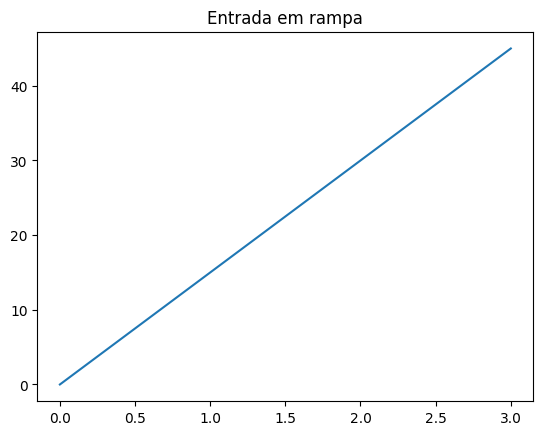

In [69]:
plt.plot(t, r)
plt.title("Entrada em rampa")
plt.show()

Calculando a saída para a rampa:

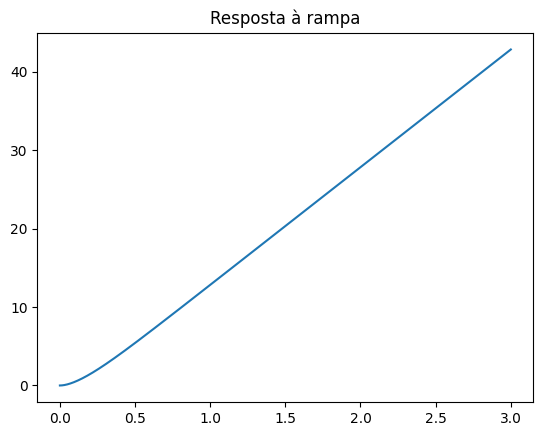

In [70]:
t_out, y_out = ctrl.forced_response(FTMF, T=t, U=r)

plt.plot(t_out, y_out)
plt.title("Resposta à rampa")
plt.show()

Calculando o erro estacionário à rampa:

In [71]:
erro = np.abs(y_out - r)
erro_estacionario = np.mean(erro[-50:])

print("\nErro estacionário: " + str(erro_estacionario))


Erro estacionário: 2.1874999724885424


Esse valor indica que existe um erro estacionário para a entrada em rampa, e também existe uma constante de erro de valocidade associada a essa resposta. Isso era esperado, visto que o sistema é do tipo 1 e temos uma entrada do tipo rampa.

# Erro estacionário para uma entrada parábola

Considere a entrada $r(t) = 15t^2u(t)$, vamos calcular o erro estacionário e plotar o gráfico de saída. Primeiro, vamos definir a entrada:

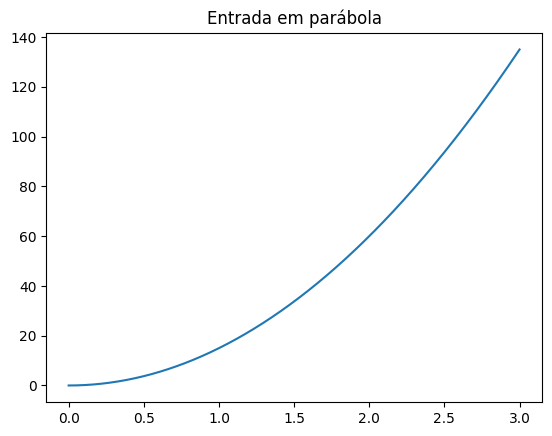

In [73]:
r = t**2 * 15

plt.plot(t, r)
plt.title("Entrada em parábola")
plt.show()

Vamos agora encontrar a saída:

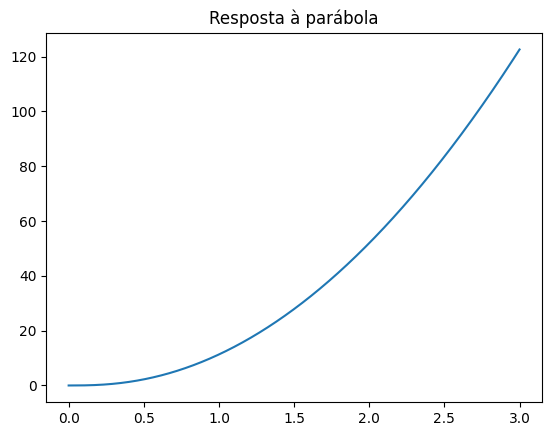

In [74]:
t_out, y_out = ctrl.forced_response(FTMF, T=t, U=r)

plt.plot(t_out, y_out)
plt.title("Resposta à parábola")
plt.show()

Encontrado o erro estavionário:

In [75]:
erro = np.abs(y_out - r)
erro_estacionario = np.mean(erro[-50:])

print("\nErro estacionário: " + str(erro_estacionario))


Erro estacionário: 12.358069576950419


Neste último caso, obtivemos um erro muito grande o que pode indicar que o erro é infinito. Verificando a teoria, vemos que isso é verdade, visto que temos um sistema do tipo 1 e injetamos uma entrada do tipo parábola.

**Exercício:** Execute o código python para o mesmo sistema, porém agora com $\frac{10(S+20)(S+30)}{(S+25)(S+35)}$ e veja os resultados dos erros e gráficos de saídas para as mesmas entradas. OBS: Não esqueça de verificar se o sistema é estável ou não.